## PCLS: endothelial figures

In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import rcParams

# verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.verbosity = 3               
sc.logging.print_version_and_date()

# making sure plots & clusters are reproducible
np.random.seed(42)

# custom functions
import sc_toolbox as sct

Running Scanpy 1.8.2, on 2022-12-03 15:18.


In [2]:
## path variables
adata_dir = '/home/niklas/projects/niche_environments_FIBROSIS/PCLS_human/01_data/ASK_joint/subsets/'
project_dir = '/home/niklas/projects/niche_environments_FIBROSIS/PCLS_human/01_data/ASK_joint/'

In [3]:
## plotting variables
fig_dir = '/home/niklas/projects/niche_environments_FIBROSIS/HUMAN_exvivo/02_figures/ASK_joint/endothelia_subset/'
sc.settings.figdir = fig_dir
sc.set_figure_params(vector_friendly = True)
plt.rcParams['figure.figsize'] = (6, 5)
plt.rcParams['pdf.fonttype'] = 42

In [4]:
## load anndata object
adata = sc.read(adata_dir + '211201_endothelia_subset_NIKLAS_annotated.h5ad')

In [5]:
## have a look at the adata object
adata

AnnData object with n_obs × n_vars = 16513 × 15662
    obs: 'condition', 'modality', 'name', 'patient', 'timepoint', 'treatment', 'identifier', 'n_counts', 'n_genes', 'percent_mito', 'QC_group', 'doublet_scores', 'size_factors', 'leiden_1', 'leiden_2', 'd_cluster', 'sub_leiden_2.2', 'auto_cell_type', 'VE Peribronchial_score', 'VE Capillary A_score', 'VE Capillary B_score', 'VE Arterial_score', 'VE Venous_score', 'cell_type', 'cell_type_group'
    var: 'n_cells', 'n_counts', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'auto_cell_type_colors', 'cell_type_colors', 'cell_type_group_colors', 'condition_colors', 'd_cluster_colors', 'dendrogram_cell_type', 'dendrogram_sub_leiden_2.2', 'hvg', 'identifier_colors', 'leiden', 'leiden_1_colors', 'leiden_2_colors', 'name_colors', 'neighbors', 'patient_colors', 'pca', 'rank_genes_groups', 'sub_leiden_2.2_colors', 'treatment_colors', 'umap'
    obsm: 'X_pca', 'X_um

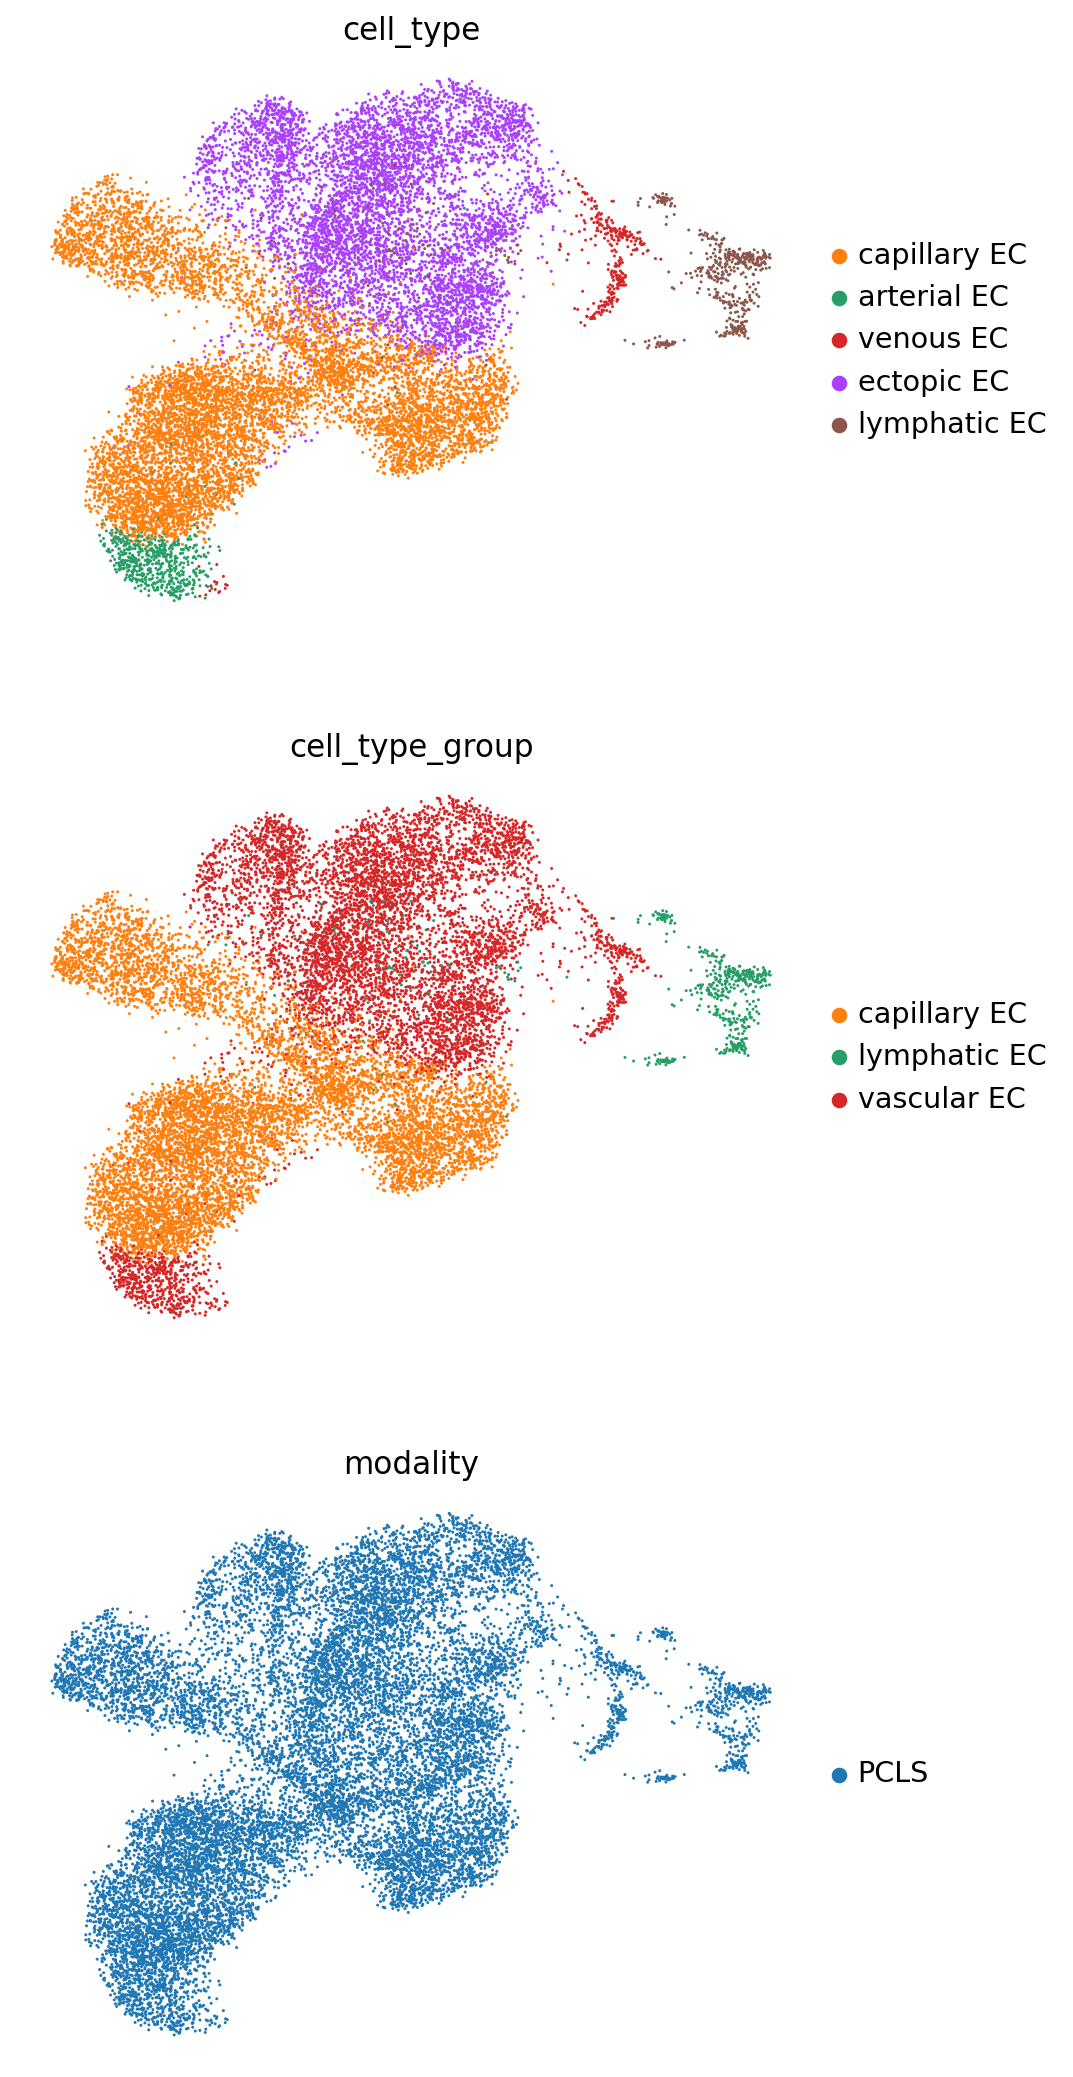

In [6]:
## overview UMAPs
sc.pl.umap(adata, color = ['cell_type',
                           'cell_type_group',
                           'modality'], ncols = 1, frameon = False)

In [7]:
## subset data: we only want to visualize CC and FC
adata = adata[adata.obs.treatment.isin(['CC','FC'])].copy()

In [8]:
adata

AnnData object with n_obs × n_vars = 10418 × 15662
    obs: 'condition', 'modality', 'name', 'patient', 'timepoint', 'treatment', 'identifier', 'n_counts', 'n_genes', 'percent_mito', 'QC_group', 'doublet_scores', 'size_factors', 'leiden_1', 'leiden_2', 'd_cluster', 'sub_leiden_2.2', 'auto_cell_type', 'VE Peribronchial_score', 'VE Capillary A_score', 'VE Capillary B_score', 'VE Arterial_score', 'VE Venous_score', 'cell_type', 'cell_type_group'
    var: 'n_cells', 'n_counts', 'means', 'dispersions', 'dispersions_norm', 'highly_variable', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'auto_cell_type_colors', 'cell_type_colors', 'cell_type_group_colors', 'condition_colors', 'd_cluster_colors', 'dendrogram_cell_type', 'dendrogram_sub_leiden_2.2', 'hvg', 'identifier_colors', 'leiden', 'leiden_1_colors', 'leiden_2_colors', 'name_colors', 'neighbors', 'patient_colors', 'pca', 'rank_genes_groups', 'sub_leiden_2.2_colors', 'treatment_colors', 'umap', 'modality_colors'
    o

### Re-calculate HVGs

In [9]:
## delete all obs colums related to highly variable genes
del(adata.var['highly_variable'])
del(adata.var['highly_variable_nbatches'])
del(adata.var['highly_variable_intersection'])

In [10]:
## filter genes
sc.pp.filter_genes(adata, min_counts = 1)
sc.pp.filter_genes(adata, min_cells = 5)

filtered out 730 genes that are detected in less than 1 counts
filtered out 1023 genes that are detected in less than 5 cells


extracting highly variable genes
    finished (0:00:02)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


/home/niklas/miniconda3/envs/niche_fibrosis_env/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/home/niklas/miniconda3/envs/niche_fibrosis_env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

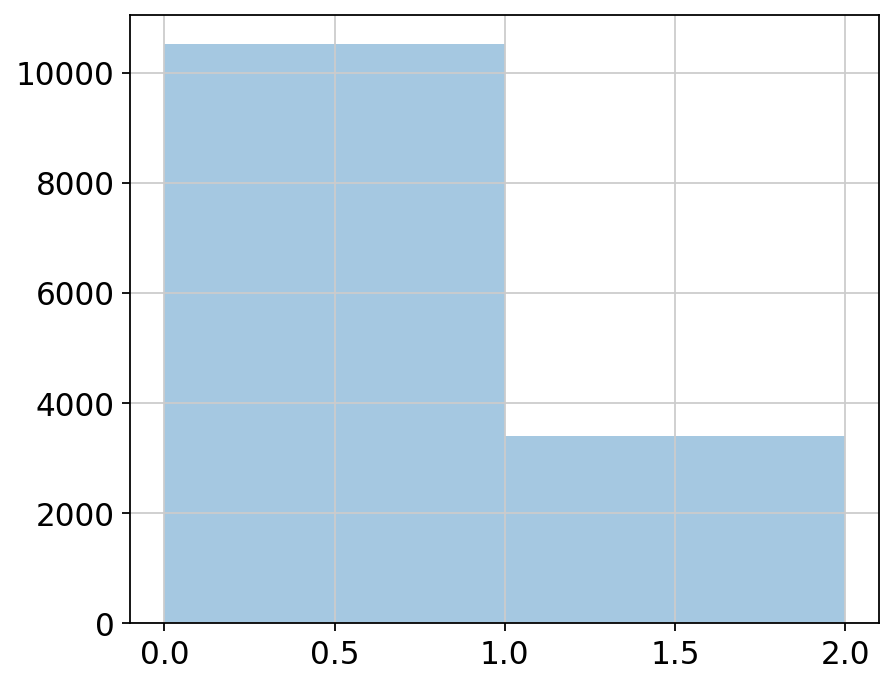

In [11]:
## compute HVGs per batch ('identifier') using seurat method
batch = 'patient'
sc.pp.highly_variable_genes(adata, min_disp = None, max_disp = None, min_mean = None, max_mean = None, 
                                batch_key = batch, n_top_genes = 2000, n_bins = 20, flavor = 'seurat', 
                                subset = False)
vartab = pd.DataFrame(adata.var['highly_variable_nbatches'], index = adata.var_names)
sb.distplot(vartab, kde = False, bins = len(np.unique(adata.obs[batch])))

In [12]:
## only consider a gene as variable if variable in at least 10 batches
thresh = 2
hvgs = vartab[vartab.highly_variable_nbatches.values >= thresh].index
print('%s Genes kept, variable in at least %s samples' %(len(hvgs), thresh))

602 Genes kept, variable in at least 2 samples


In [13]:
## remove cell cycle genes (MOUSE) from list of HVGs
all_cc_genes = pd.read_table('/home/niklas/data/gene_lists/macosko_cell_cycle_genes.txt', header=0)
cc_genes = np.concatenate([all_cc_genes['IG1.S'], all_cc_genes['S'], all_cc_genes['G2.M'], all_cc_genes['M'], all_cc_genes['M.G1']]).astype(str)
cc_genes = [cc_genes[i] for i in np.arange(0,len(cc_genes))]
hvgs = np.setdiff1d(hvgs, cc_genes)

In [14]:
## set HVGs
adata.var['highly_variable'] = [g in hvgs for g in adata.var_names]
## no. of resulting HVGs
sum(adata.var['highly_variable'])

580

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)


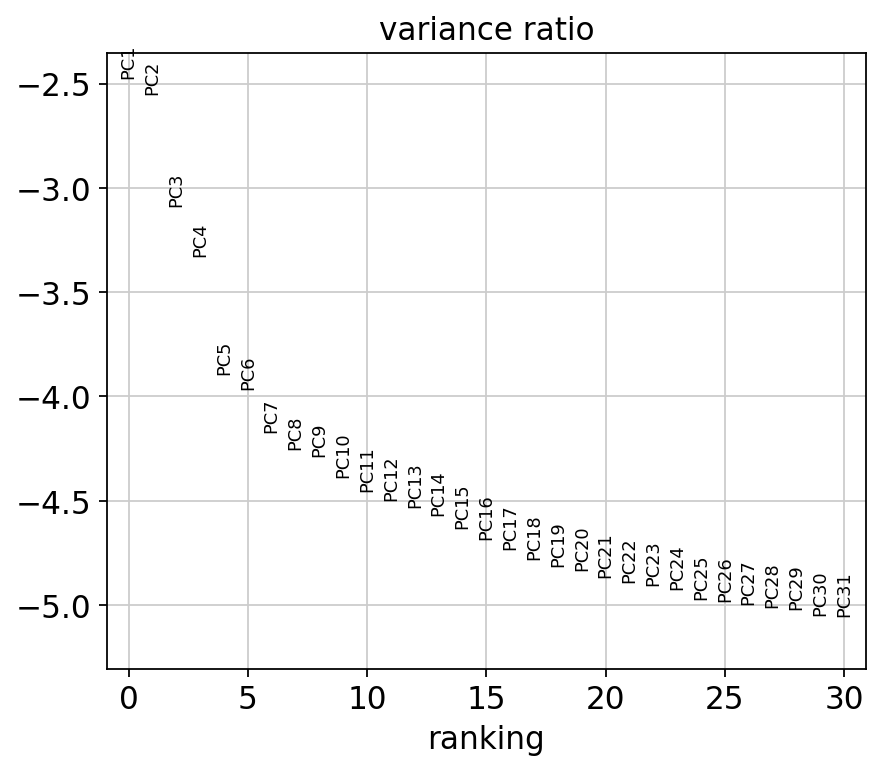

In [15]:
## PCA
sc.pp.pca(adata, use_highly_variable = True)
sc.pl.pca_variance_ratio(adata, n_pcs=30, log=True)

computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:02:12)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:04)


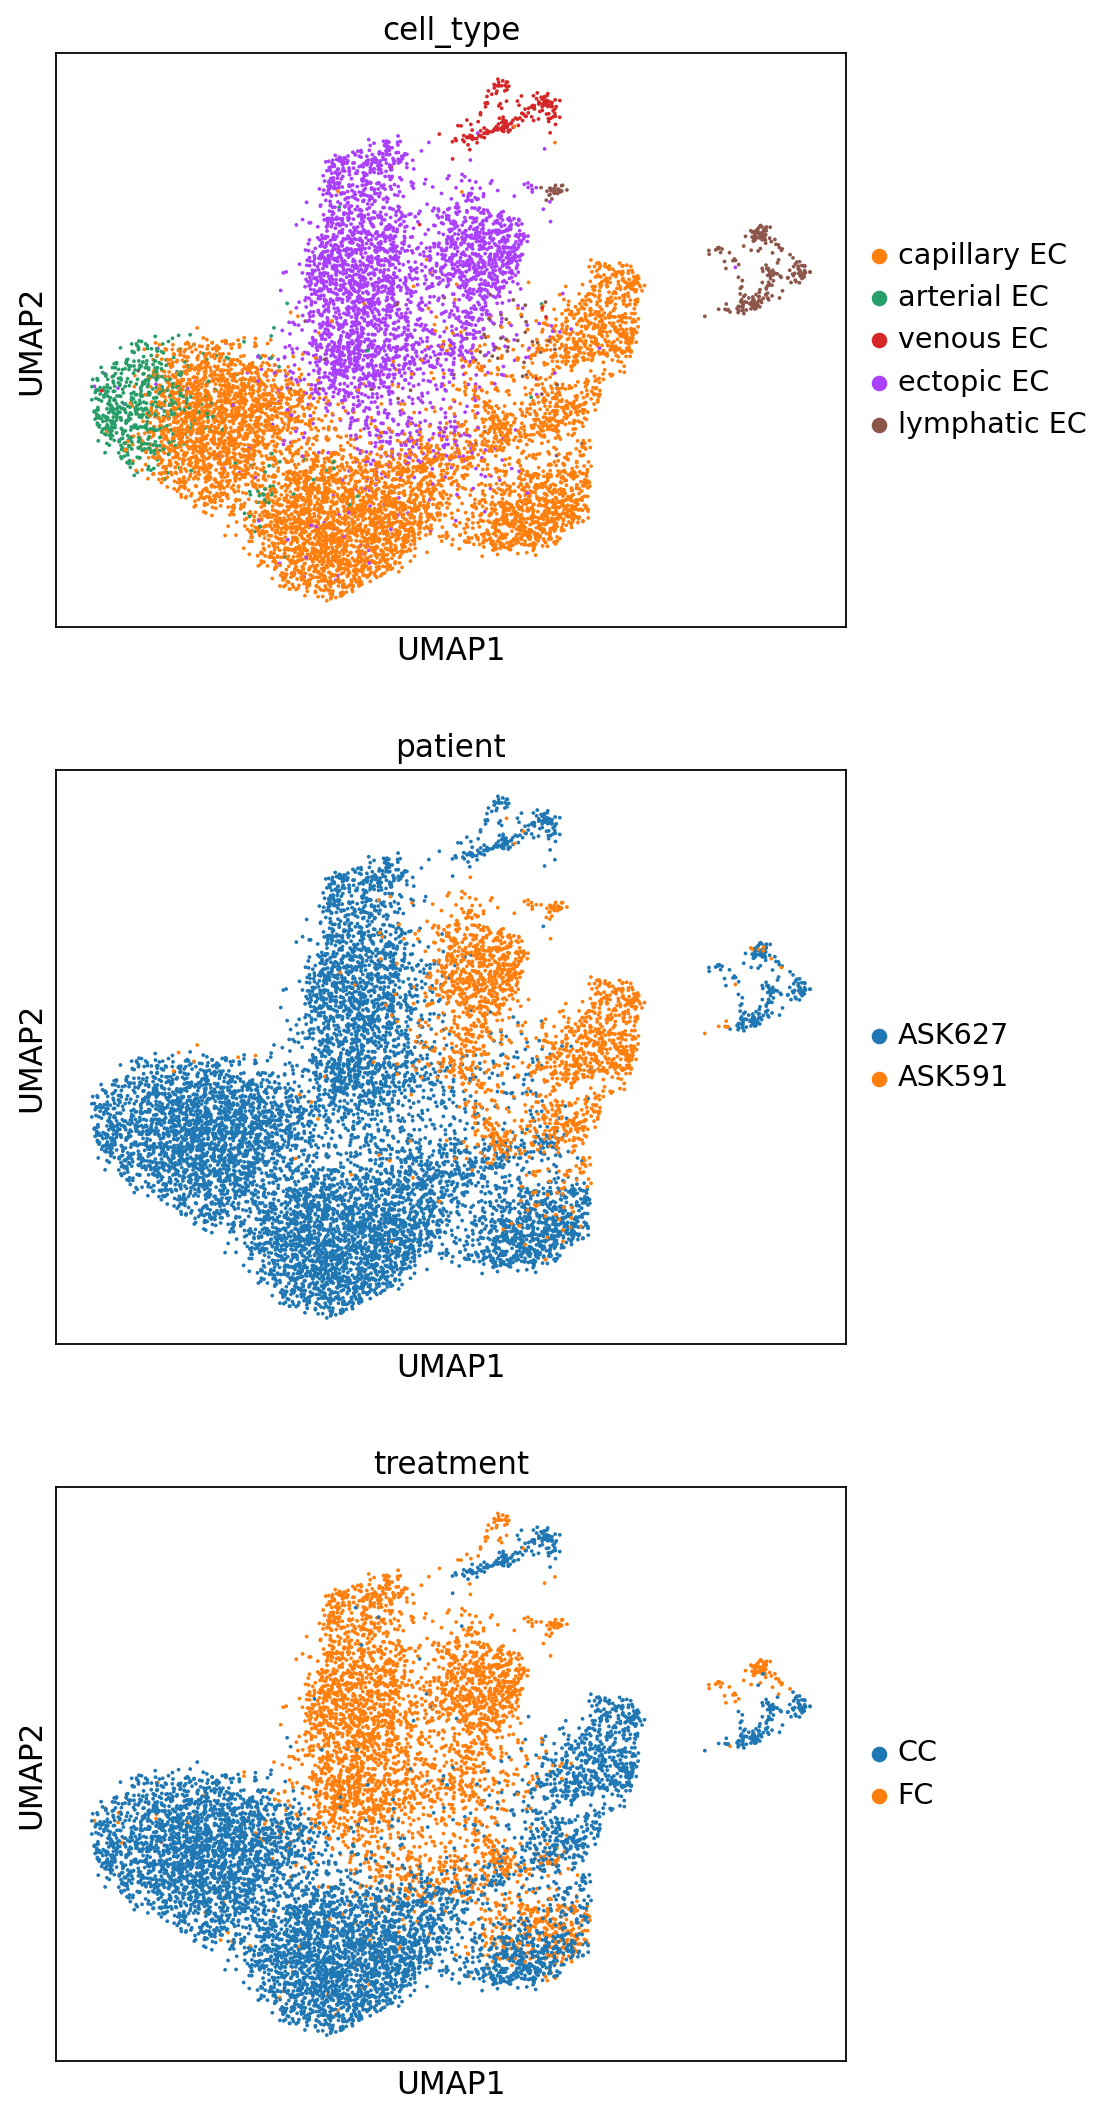

In [16]:
## graph based clustering
sc.pp.neighbors(adata, n_pcs = 30, n_neighbors = 30)
sc.tl.umap(adata)
sc.pl.umap(adata, color = ['cell_type',
                           'patient',
                           'treatment'], ncols = 1)

### Save figures

In [17]:
## color scheme for treatments
treatment_colors = {'CC' : '#87CEFA', # CC
                    'FC' : '#32145E', # FC
                    'FC+Nintedanib' : '#D03833', # Nintedanib
                    'FC+CMP4' : '#F6991C', # CMP4
                   }

In [18]:
ct_colors = {'capillary EC' : '#1f77b4',
             'arterial EC' : '#ff7f0e',
             'venous EC' : '#279e68',
             'ectopic EC' : '#d62728',
             'lymphatic EC' : '#aa40fc'
}

In [19]:
def mysize(w, h, d):
    fig, ax = plt.subplots(figsize = (w, h), dpi = d)
    return(fig.gca())

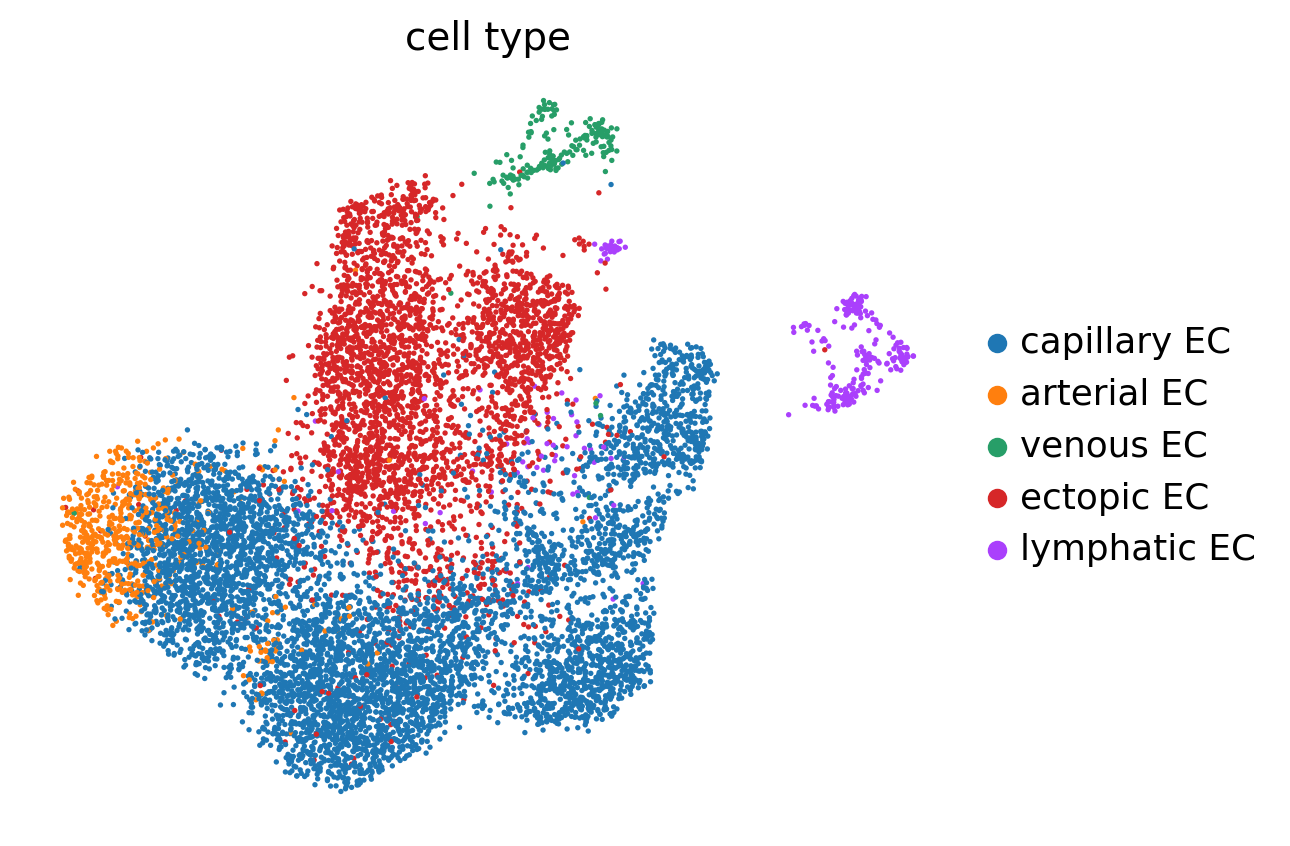

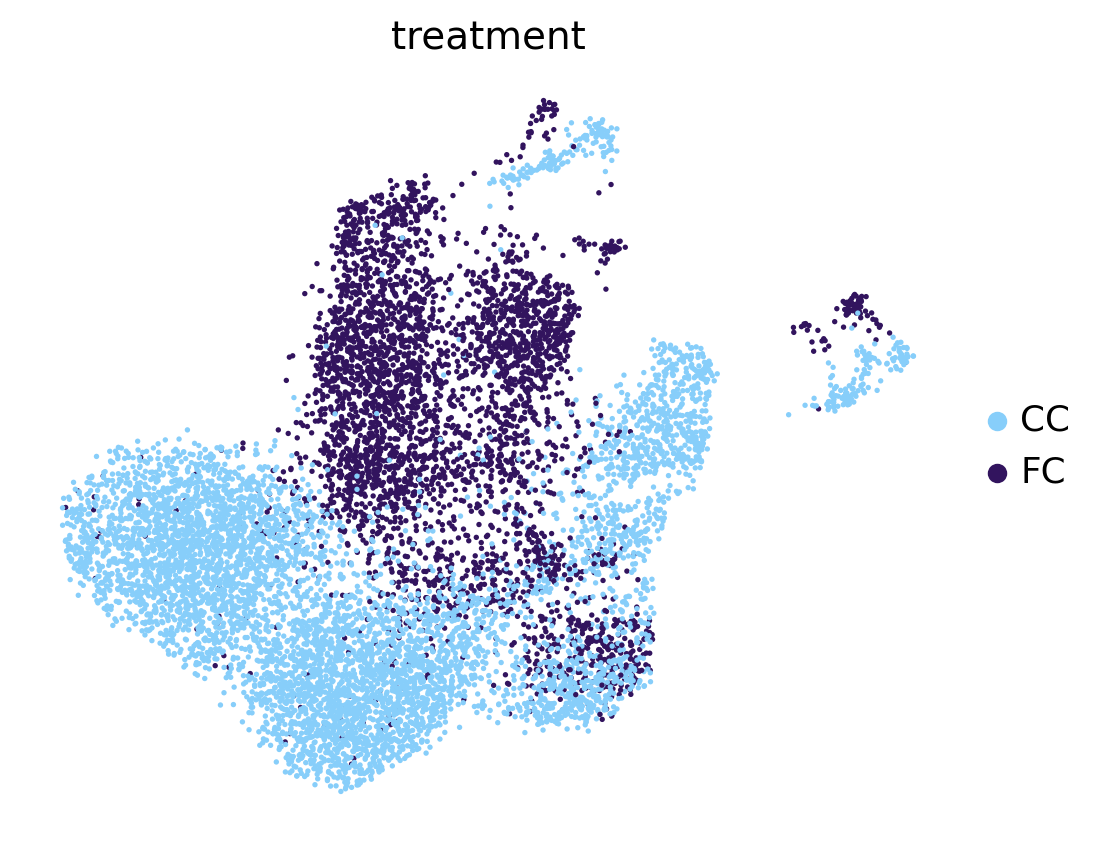

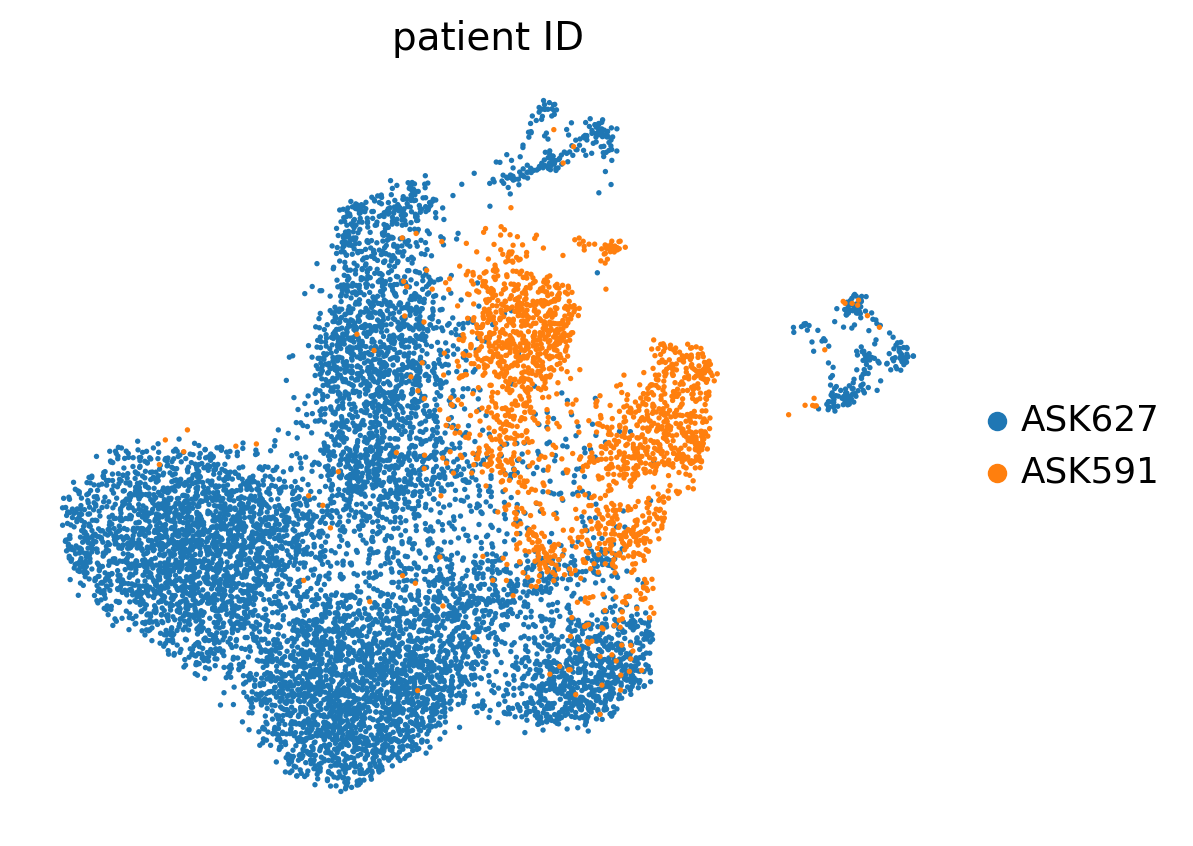

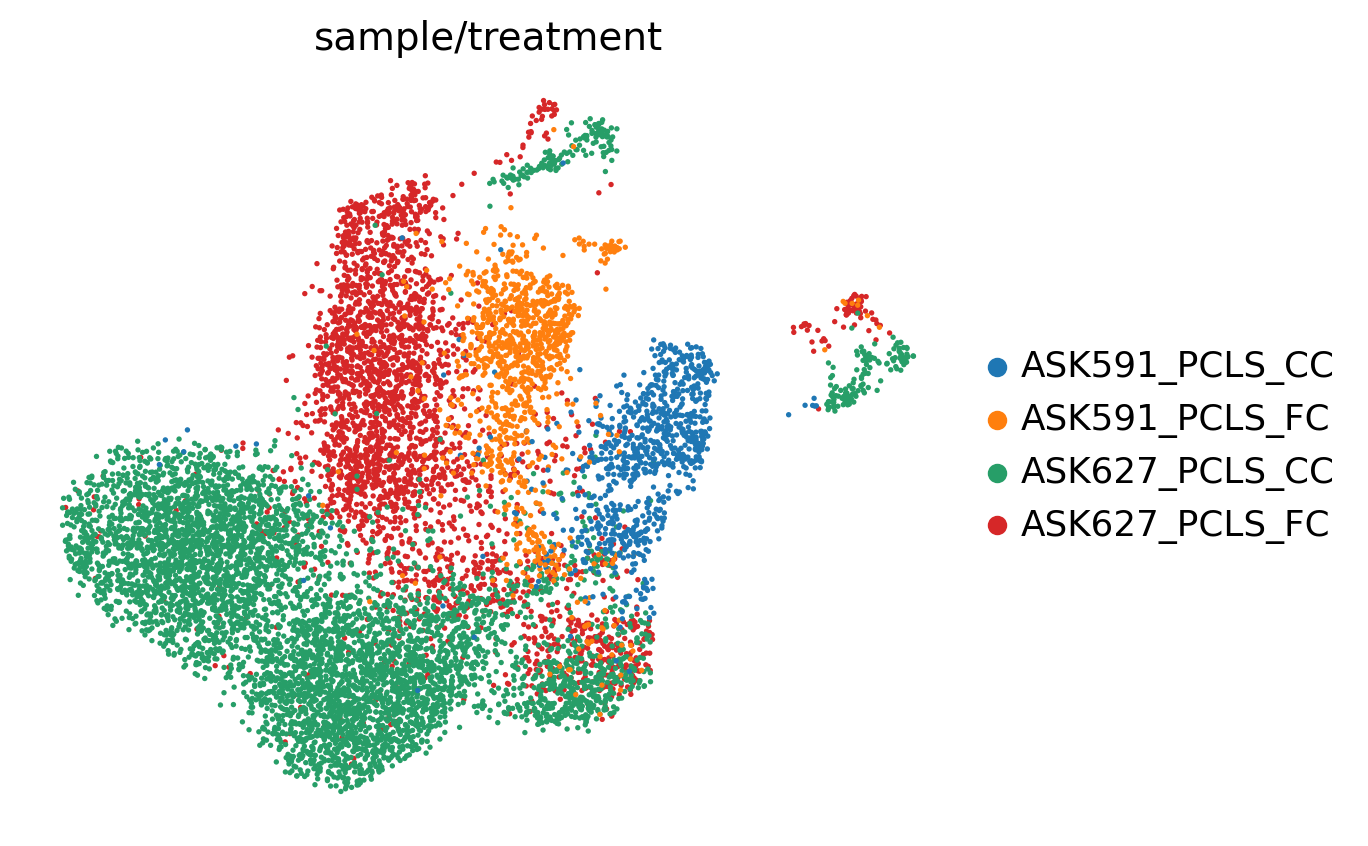

In [20]:
## cell type
sc.pl.umap(adata, color = ['cell_type'], title = 'cell type', frameon = False,
           palette = ct_colors, 
           ax = mysize(6, 5, 100), size = 15, save = '_celltype.pdf')
## treatment
sc.pl.umap(adata, color = ['treatment'], title = 'treatment', frameon = False, 
           palette = treatment_colors, 
           ax = mysize(6, 5, 100), size = 15, save = '_treatment.pdf')
## patient / sample ID
sc.pl.umap(adata, color = ['patient'], title = 'patient ID', frameon = False,
           ax = mysize(6, 5, 100), size = 15, save = '_ASK_identifier.pdf')                           
## sample/treament
sc.pl.umap(adata, color = ['name'], title = 'sample/treatment', frameon = False,
           palette = sb.color_palette(), 
           ax = mysize(6, 5, 100), size = 15, save = '_sample_treatment.pdf')

In [21]:
## frequency table
xlabel = 'name'
cell_types_label = 'cell_type'
cols = adata.uns['%s_colors' %cell_types_label]
celltypes = adata.obs[cell_types_label].cat.categories

relFreqs = sct.calc.relative_frequencies(adata, group_by = cell_types_label, xlabel = xlabel, condition = None)
relFreqs.head(2)

capillary EC  arterial EC  venous EC  ectopic EC  lymphatic EC  \
muc24271      0.163311     0.000000   0.002237    0.805369      0.029083   
muc24272      0.975265     0.001178   0.000000    0.008245      0.015312   

                    name  
muc24271  ASK591_PCLS_FC  
muc24272  ASK591_PCLS_CC

In [22]:
order = ['ASK591_PCLS_CC',
         'ASK627_PCLS_CC',
         'ASK591_PCLS_FC',
         'ASK627_PCLS_FC'
        ]

Saving Figure to /home/niklas/projects/niche_environments_FIBROSIS/HUMAN_exvivo/02_figures/AS
K_joint/endothelia_subset/rel_freqs.pdf

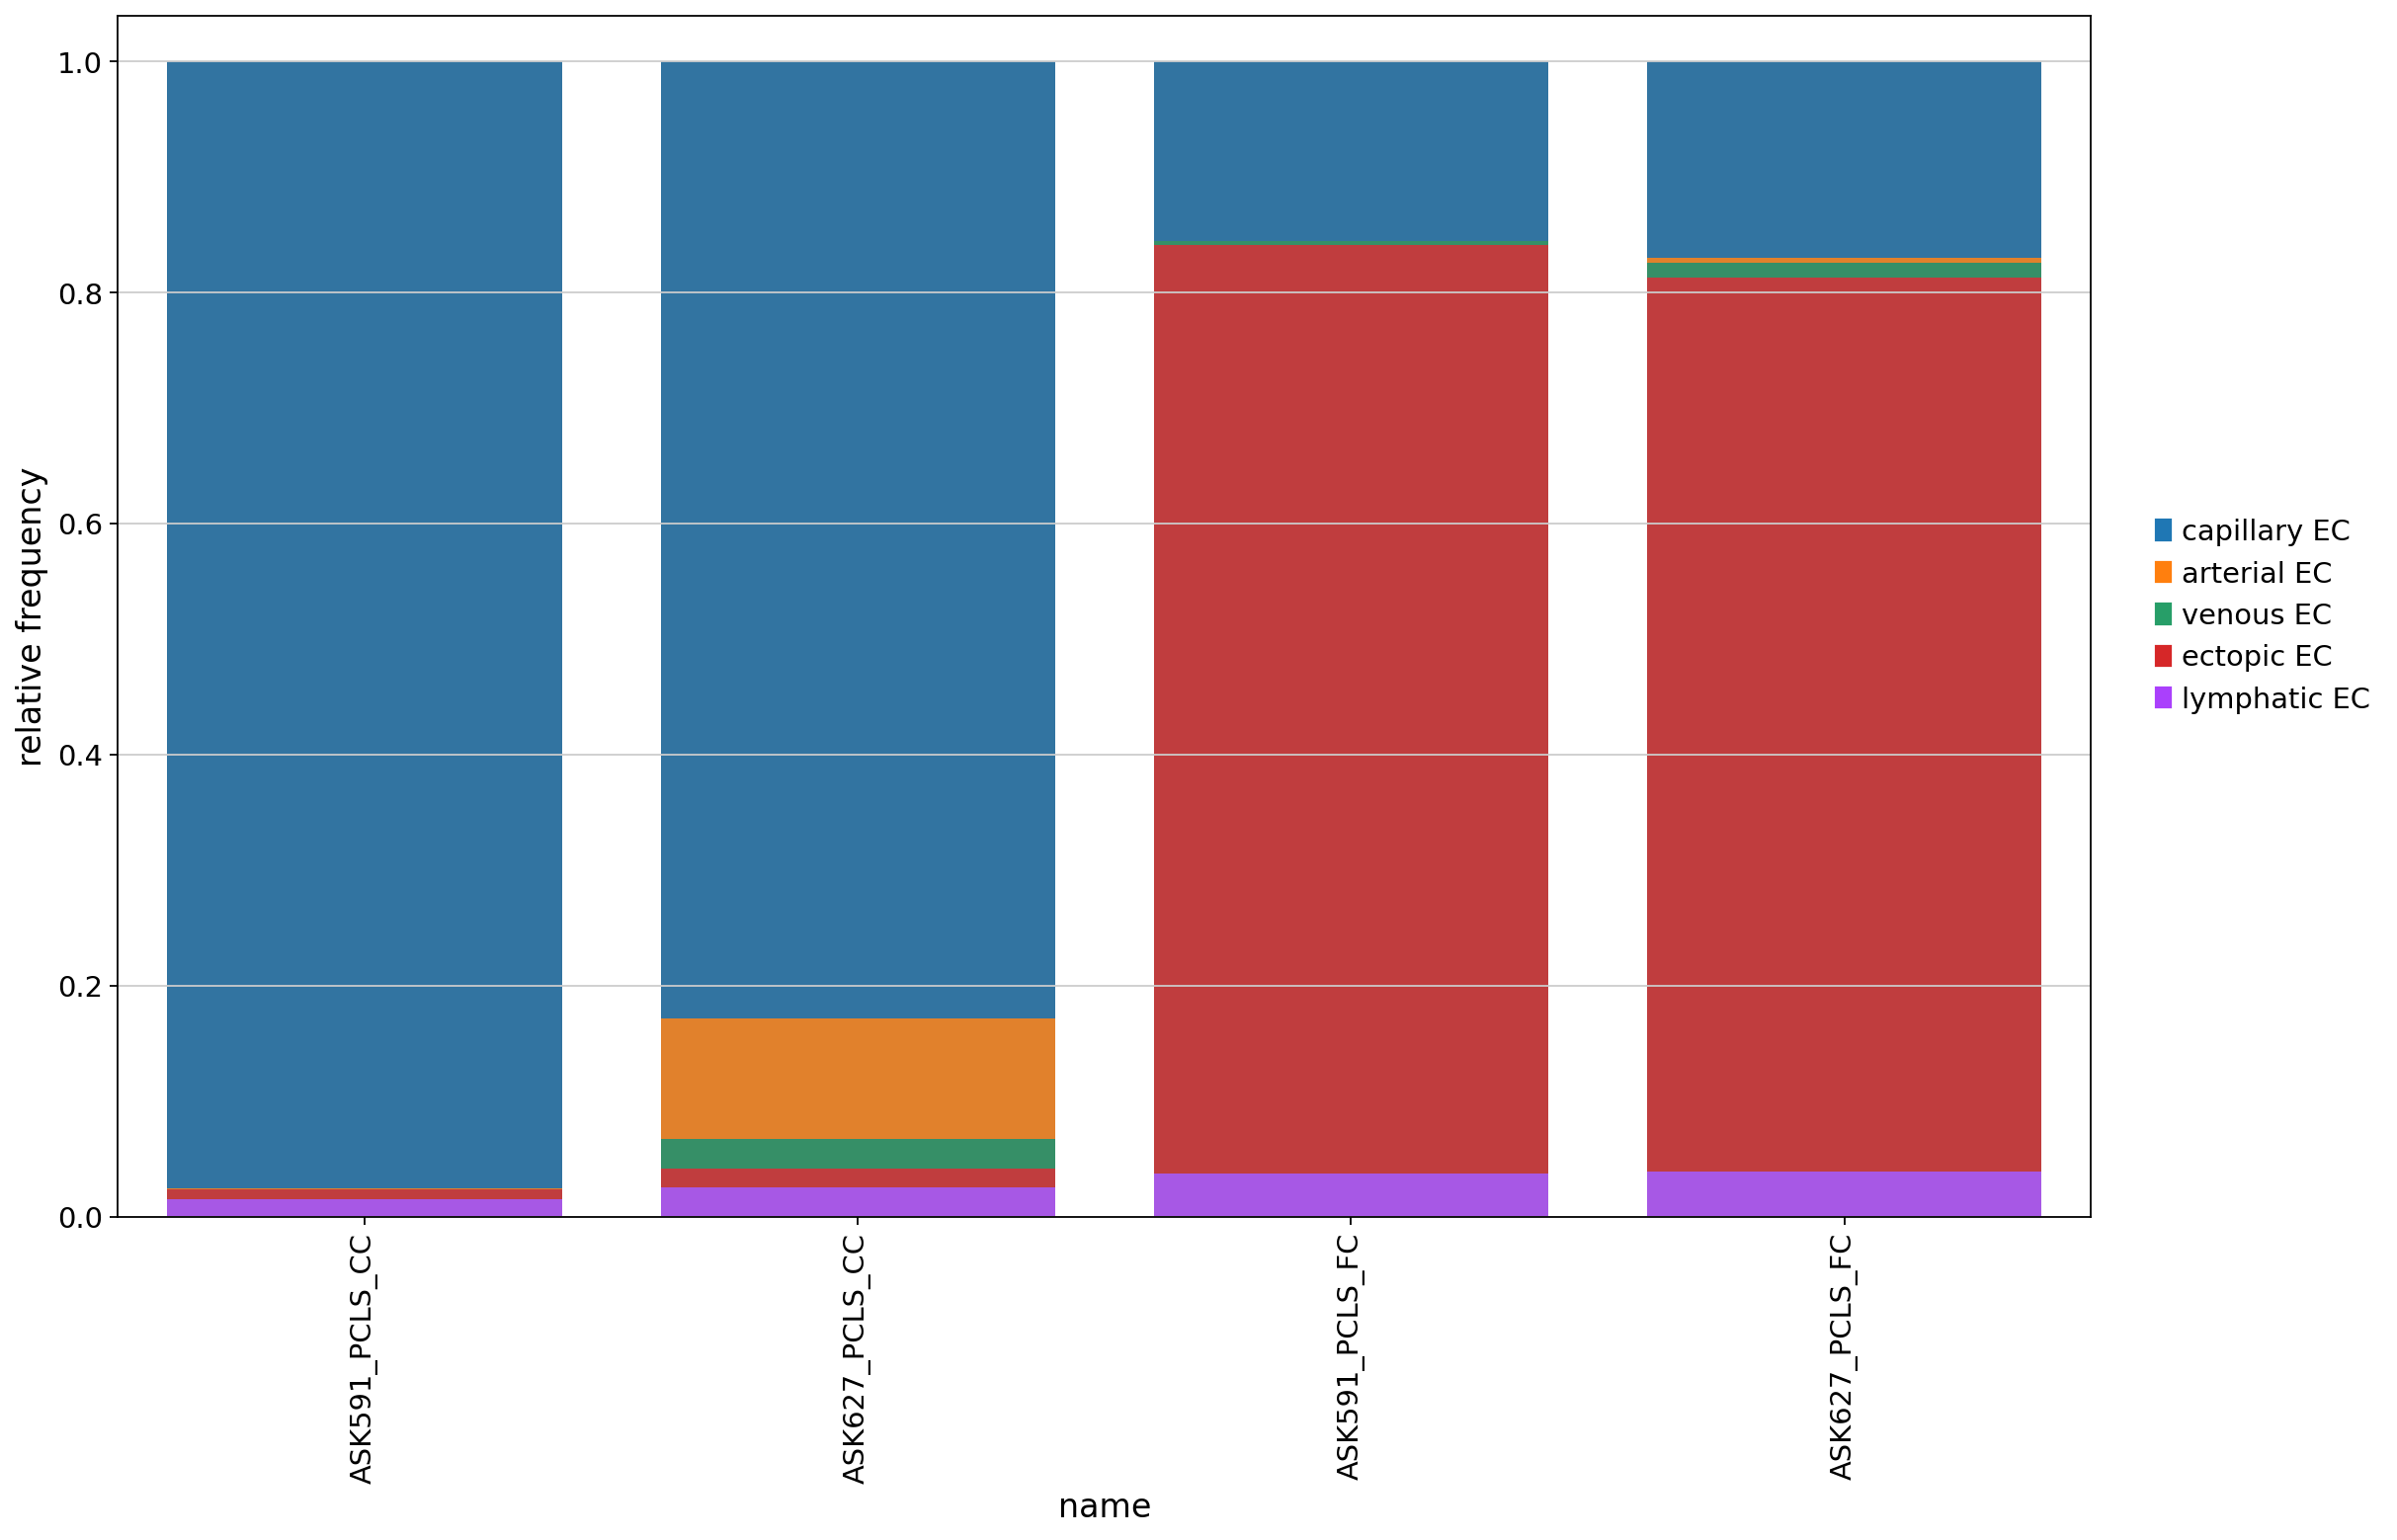

In [23]:
## cell type frequencies per treatment category
sct.plot.cluster_composition_stacked_barplot(relFreqs, xlabel = xlabel, figsize = (16,10), order = order,
                              colors = list(cols), width = 0.8,
                              save = '/home/niklas/projects/niche_environments_FIBROSIS/HUMAN_exvivo/02_figures/ASK_joint/endothelia_subset/rel_freqs.pdf')

In [24]:
import scipy.stats as stats
#perform the Wilcoxon rank sum test
ab_cc = relFreqs[relFreqs['name'].isin(['ASK591_PCLS_CC','ASK627_PCLS_CC'])]['ectopic EC']
ab_fc = relFreqs[relFreqs['name'].isin(['ASK591_PCLS_FC','ASK627_PCLS_FC'])]['ectopic EC']
stats.ranksums(ab_cc, ab_fc)

RanksumsResult(statistic=-1.7320508075688774, pvalue=0.0832645166635504)

In [25]:
## automated heatmap
sc.tl.dendrogram(adata, groupby = 'cell_type')
sc.tl.rank_genes_groups(adata, groupby = 'cell_type', groups = 'all', use_raw = True, method = 'wilcoxon', n_genes=500)

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_cell_type']`
ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:06)


In [26]:
## create marker table
result = adata.uns['rank_genes_groups']
allMarkers = []
for cluster in result['names'].dtype.names:
    current = pd.DataFrame({'gene': result['names'][cluster], 'score': result['scores'][cluster],
                            'logfoldchange': result['logfoldchanges'][cluster], 'pval': result['pvals'][cluster],
                            'pval_adj': result['pvals_adj'][cluster], 'cell_type': cluster})
    allMarkers.append(current)
allMarkers = pd.concat(allMarkers)
allMarkers.head()

gene      score  logfoldchange           pval       pval_adj     cell_type
0  CLDN5  48.659801       2.075687   0.000000e+00   0.000000e+00  capillary EC
1    FTL  46.041653       4.393431   0.000000e+00   0.000000e+00  capillary EC
2   STC1  33.215469       1.683272  6.437484e-242  3.635771e-239  capillary EC
3  HLA-E  32.023911       0.651659  5.068221e-225  2.289949e-222  capillary EC
4  EDNRB  31.445990       2.658293  4.762406e-217  1.756550e-214  capillary EC

In [27]:
## sort marker gene table by log FC and adjusted FC
allMarkers = allMarkers.sort_values(['cell_type','logfoldchange','score'], ascending=[True,False,True])
allMarkers.head()

gene      score  logfoldchange          pval      pval_adj  \
420      NOS1   6.937397       3.836047  3.993895e-12  1.449431e-10   
248     CYTL1   9.692949       3.587101  3.230626e-22  2.119262e-20   
365     ACAT2   7.524568       3.170996  5.289483e-14  2.265328e-12   
466  C12orf75   6.423793       3.101906  1.329198e-10  4.259327e-09   
200       BMX  10.909395       2.967792  1.039454e-27  8.462186e-26   

       cell_type  
420  arterial EC  
248  arterial EC  
365  arterial EC  
466  arterial EC  
200  arterial EC

In [28]:
## save marker table
out_dir = '/home/niklas/projects/niche_environments_FIBROSIS/HUMAN_exvivo/01_data/'
allMarkers.to_csv(out_dir + '220128_PCLS_human_ASK_joint_endothelia_marker_table.csv', index = False)

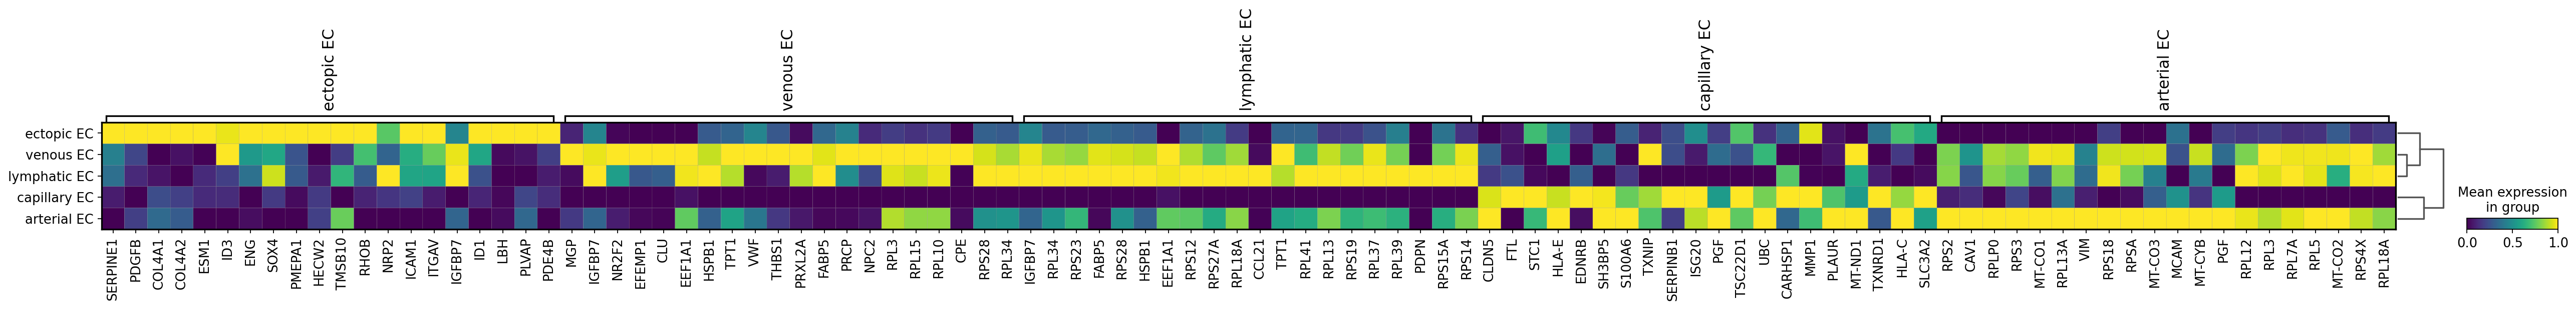

In [29]:
sc.pl.rank_genes_groups_matrixplot(adata, n_genes = 20, standard_scale = 'var', save= 'auto_markers.pdf')

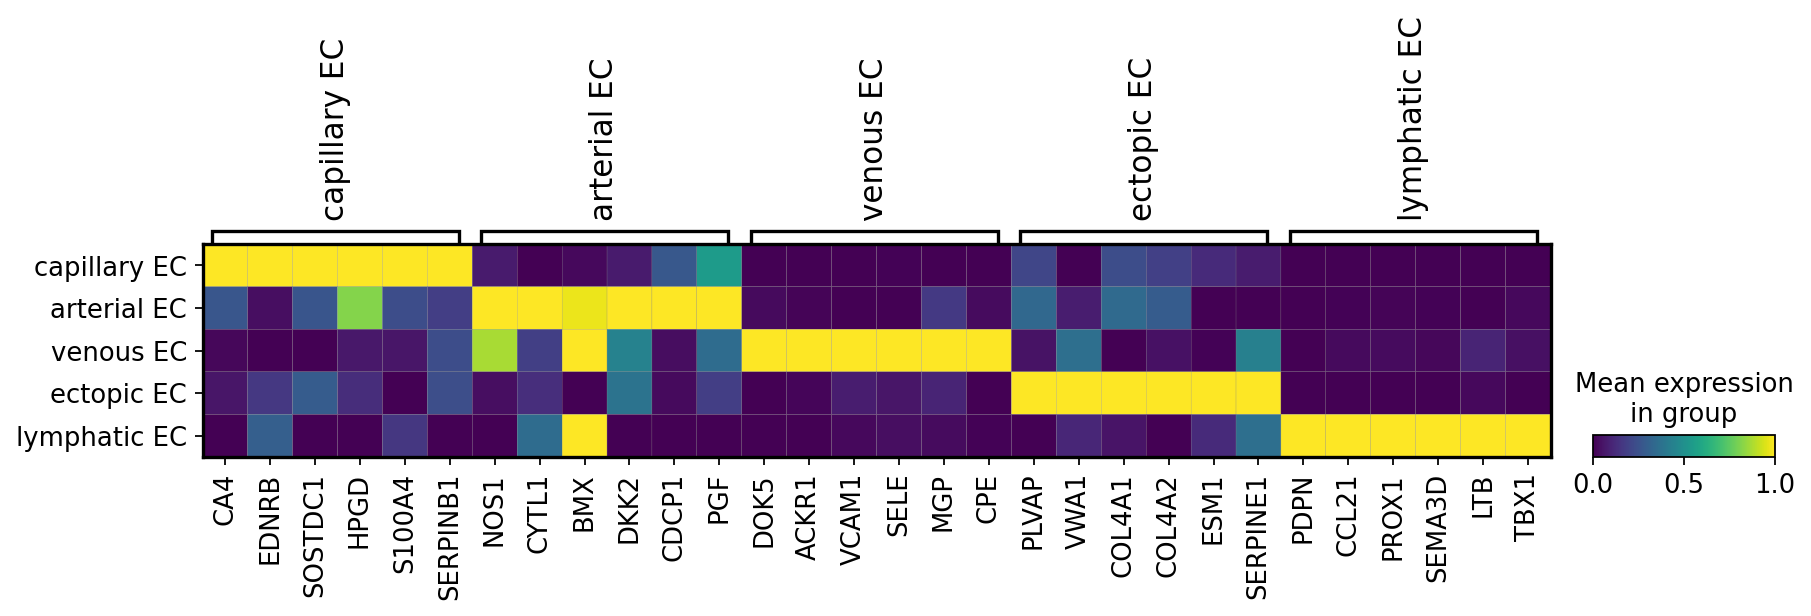

In [30]:
## custom heatmap
# matrixplot with marker genes
celltype_markers={'capillary EC' : ['CA4','EDNRB','SOSTDC1','HPGD','S100A4','SERPINB1'],
                  'arterial EC' : ['NOS1','CYTL1','BMX','DKK2','CDCP1','PGF'],#'CLDN10','CXCL12','GJA4','HEY1','IGFBP3','PGF','SOX18','FBLN2','DLL4','GJA4','IGFBP3'
                  'venous EC' : ['DOK5','ACKR1','VCAM1','SELE','MGP','CPE'],#'THBS1','FAM155A','PTGIS','CDH11','C7','CLU',
                  'ectopic EC' : ['PLVAP','VWA1','COL4A1','COL4A2','ESM1','SERPINE1'],
                  'lymphatic EC' : ['PDPN','CCL21','PROX1','SEMA3D','LTB','TBX1']#,'NTS','SCN3B','GYPC'            
}   

sc.pl.matrixplot(adata, celltype_markers, groupby = 'cell_type',standard_scale='var', dendrogram=False,
                     save='curated_markers.pdf' )

### Scorings: invivo ectopic EC signature 

In [31]:
ec = adata[adata.obs.cell_type_group.isin(['vascular EC','capillary EC'])]

In [32]:
marker_folder = '/home/niklas/projects/niche_environments_FIBROSIS/HUMAN_invivo/01_data/marker_table/'
marker_table = pd.read_csv(marker_folder + '220111_CPC_IPF_reference_endothelia_markers_table_celltype.csv', sep = ',', index_col = None)
marker_table.head(5)

gene      score  logfoldchange           pval       pval_adj  \
0      DKK2  53.597485       7.678239   0.000000e+00   0.000000e+00   
1    IGFBP3  45.002697       5.813240   0.000000e+00   0.000000e+00   
2     FBLN5  27.455873       5.151602  5.911639e-166  7.594116e-163   
3  SERPINE2  37.917576       5.117075   0.000000e+00   0.000000e+00   
4      HEY1  52.406086       3.586947   0.000000e+00   0.000000e+00   

     cell_type  pct_cell_type  pct_background  
0  arterial EC       0.525955        0.006444  
1  arterial EC       0.456905        0.026365  
2  arterial EC       0.277669        0.011473  
3  arterial EC       0.386141        0.020000  
4  arterial EC       0.581538        0.084754

In [33]:
cell_type = 'ectopic EC'
s_name = 'ectopic EC signature'

In [34]:
score_genes = marker_table[marker_table['cell_type'] == 'ectopic EC']
score_genes = score_genes[score_genes['logfoldchange'] > 2]
score_genes = score_genes[score_genes['pct_background'] < 0.15] ## more strict here to get rid of some genes shared with venous ECs

In [35]:
score_genes_list = score_genes['gene'].to_list()

In [36]:
sc.tl.score_genes(ec, gene_list = score_genes_list, score_name = s_name)

computing score 'ectopic EC signature'


Trying to set attribute `.obs` of view, copying.


    finished: added
    'ectopic EC signature', score of gene set (adata.obs).
    649 total control genes are used. (0:00:00)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Saving to /home/niklas/projects/niche_environments_FIBROSIS/HUMAN_exvivo/02_figures/ASK_joint
/endothelia_subset/boxplot_ectopic_EC_score_treatment.pdf

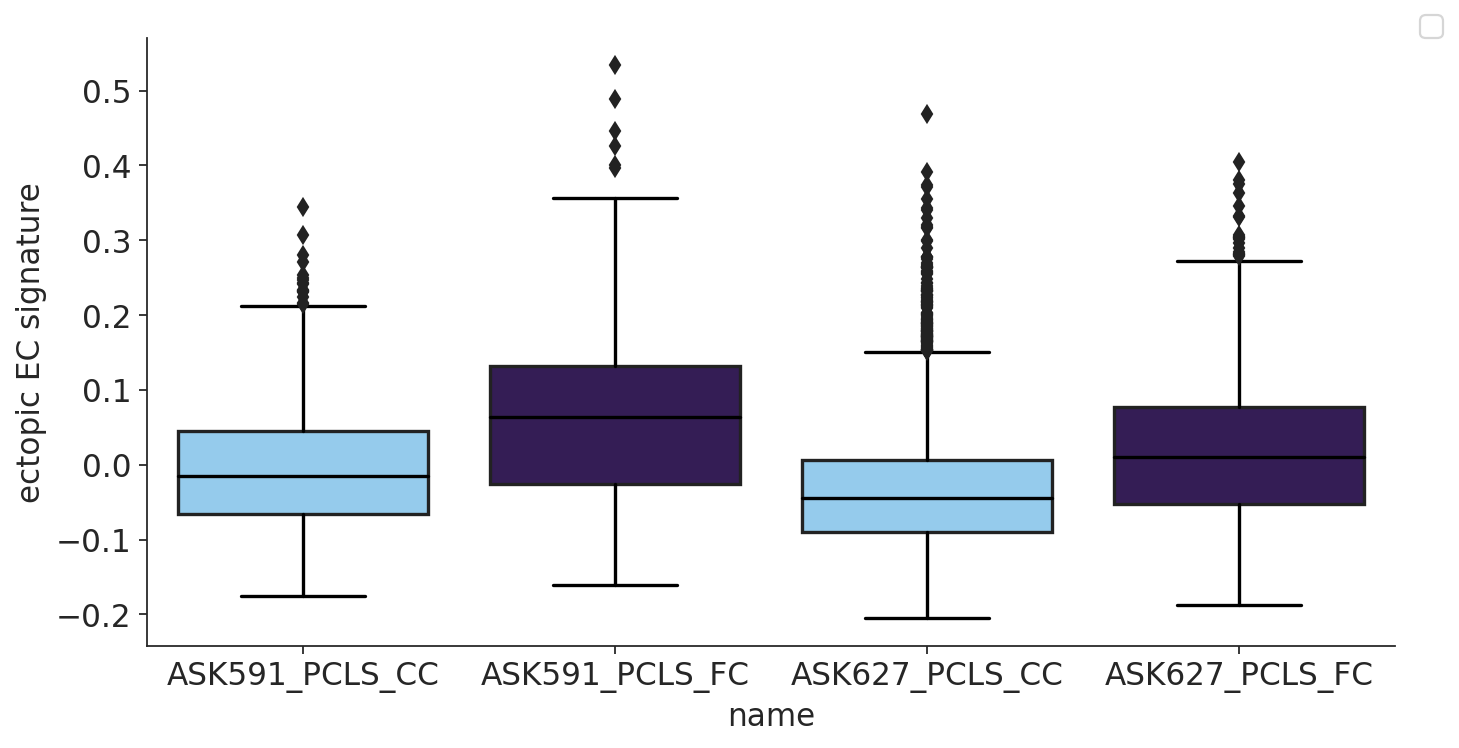

In [37]:
xlabel = 'name'
cols = ec.uns['%s_colors' %'treatment']
score = sc.get.obs_df(ec, keys = [s_name, xlabel], layer = None, use_raw = True)
sct.plot.gene_boxplot(score, score = s_name, xlabel = xlabel, figsize = (10, 5), palette = cols, width = 0.8,
                      save = fig_dir + 'boxplot_ectopic_EC_score_treatment.pdf')

In [38]:
ask627_score_fc = score[score['name'].isin(['ASK627_PCLS_FC'])]['ectopic EC signature'].to_list()
ask627_score_cc = score[score['name'].isin(['ASK627_PCLS_CC'])]['ectopic EC signature'].to_list()
ask591_score_fc = score[score['name'].isin(['ASK591_PCLS_FC'])]['ectopic EC signature'].to_list()
ask591_score_cc = score[score['name'].isin(['ASK591_PCLS_CC'])]['ectopic EC signature'].to_list()

In [39]:
import scipy.stats as stats
#perform the Mann-Whitney U test for ASK591
stats.mannwhitneyu(ask591_score_cc, ask591_score_fc, alternative='two-sided')

MannwhitneyuResult(statistic=267004.0, pvalue=2.5473783203137324e-36)

In [40]:
#perform the Mann-Whitney U test for ASK627
stats.mannwhitneyu(ask627_score_cc, ask627_score_fc, alternative='two-sided')

MannwhitneyuResult(statistic=5163144.0, pvalue=1.1426842213196283e-137)

### Peribronchial / ectopic EC marker genes

In [41]:
from matplotlib import colors
grey_red = colors.LinearSegmentedColormap.from_list("grouping", ["lightgray", "red", "darkred"], N=128)

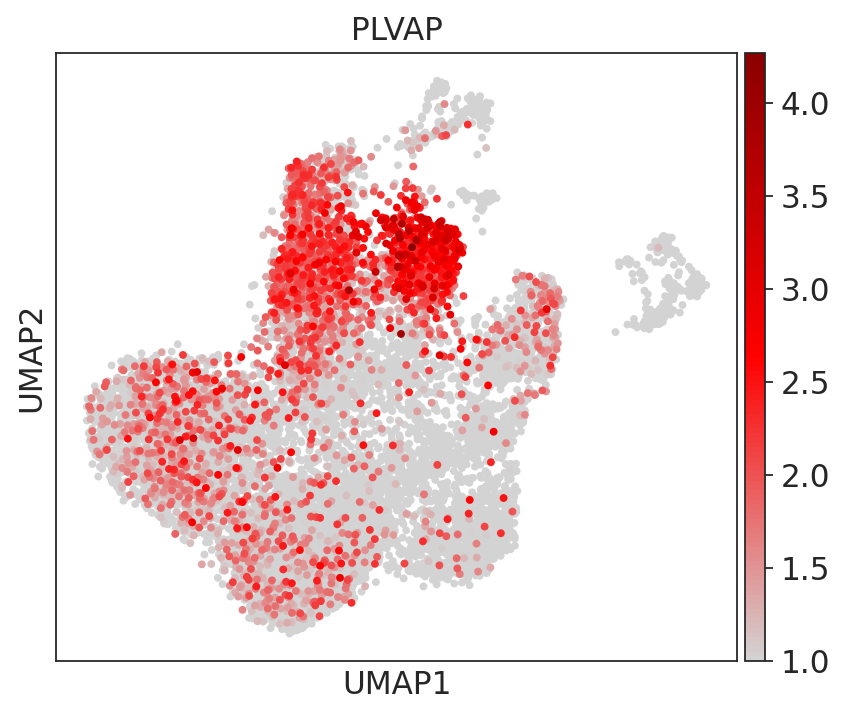

In [42]:
sc.pl.umap(adata, color = ['PLVAP'], ncols = 2, size = 50, cmap = grey_red, vmin = 1.0,
           save = '_ectopicEC_marker_genes_PLVAP.pdf')

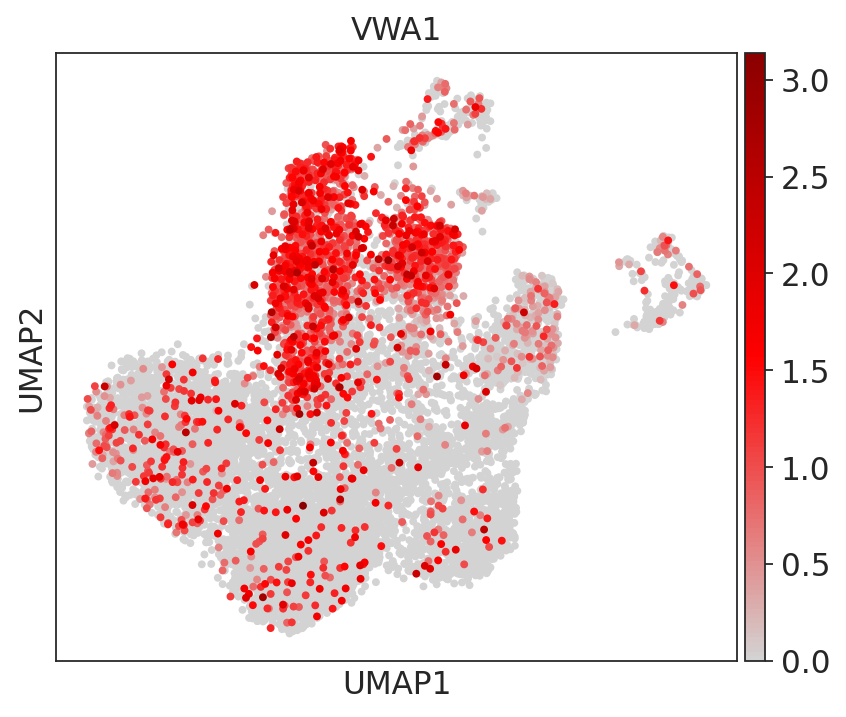

In [43]:
sc.pl.umap(adata, color = ['VWA1'], ncols = 2, size = 50, cmap = grey_red,
           save = '_ectopicEC_marker_genes_VWA1.pdf')

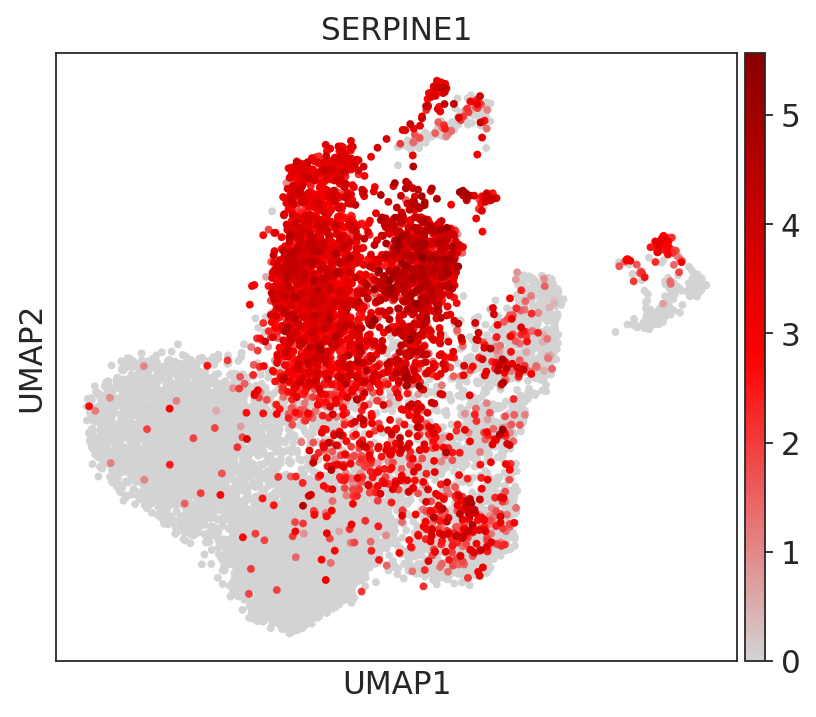

In [44]:
sc.pl.umap(adata, color = ['SERPINE1'], ncols = 2, size = 50, cmap = grey_red,
           save = '_ectopicEC_marker_genes_SERPINE1.pdf')

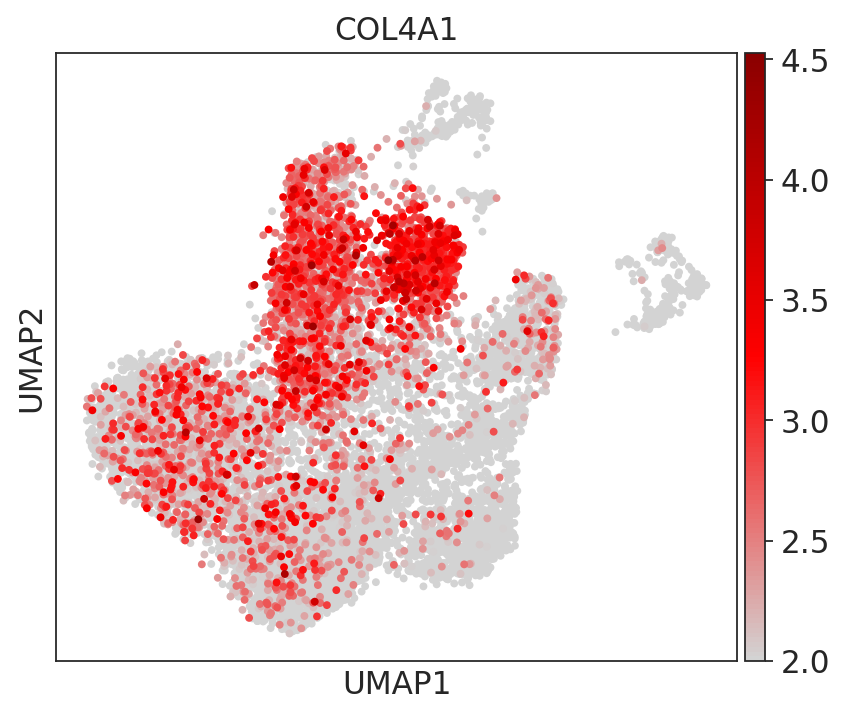

In [45]:
sc.pl.umap(adata, color = ['COL4A1'], ncols = 2, size = 50, cmap = grey_red, vmin = 2,
           save = '_ectopicEC_marker_genes_COL4A1.pdf')

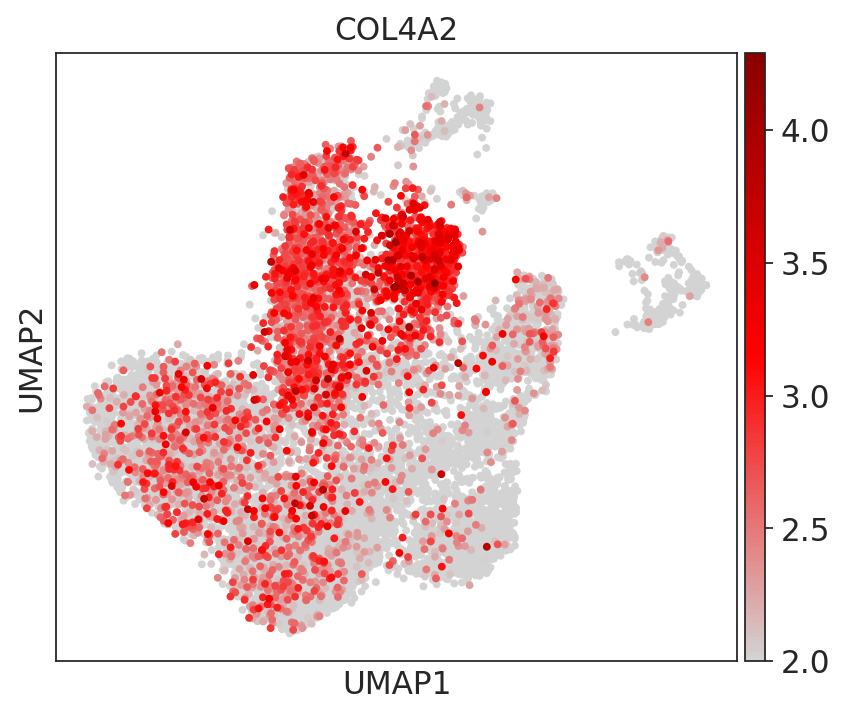

In [46]:
sc.pl.umap(adata, color = ['COL4A2'], ncols = 2, size = 50, cmap = grey_red, vmin = 2,
           save = '_ectopicEC_marker_genes_COL4A2.pdf')

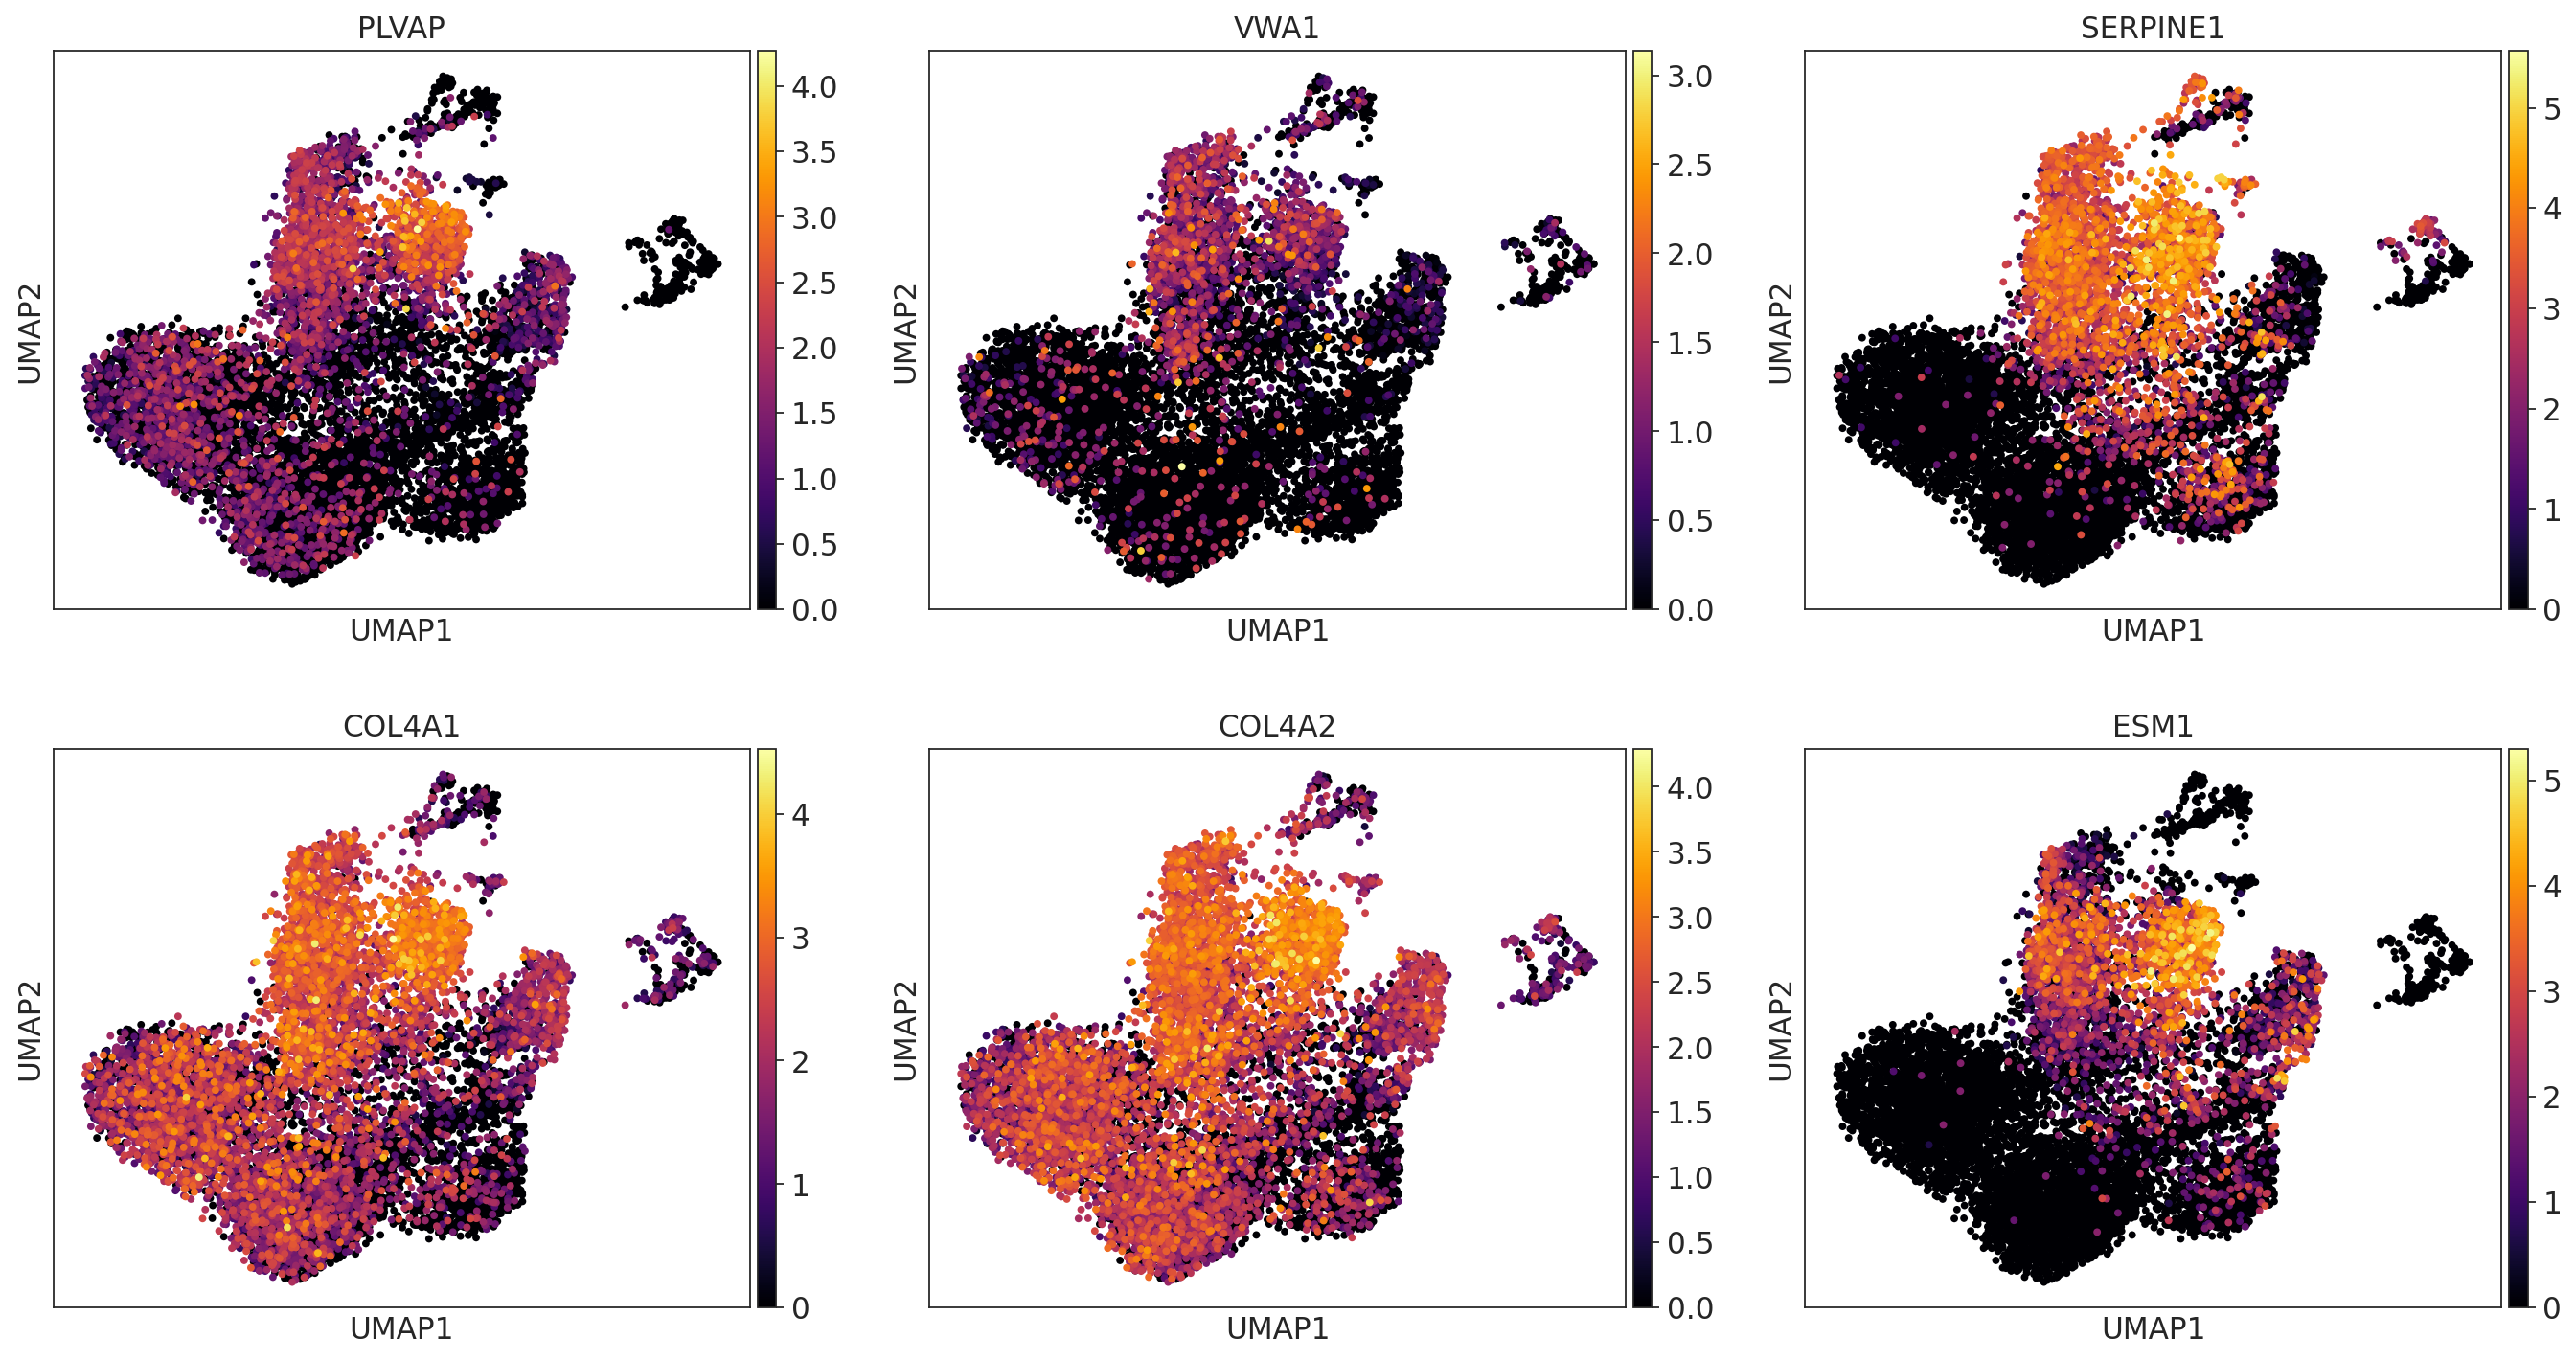

In [47]:
sc.pl.umap(adata, color = ['PLVAP','VWA1','SERPINE1','COL4A1','COL4A2','ESM1'], 
           ncols = 3, size = 50, cmap = 'inferno', 
           save = '_ectopicEC_marker_genes.pdf')